In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load dataset
df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'sex', 'age', 'fare']].dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Step 3: Define features and target
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree model
model = DecisionTreeClassifier(max_depth=3)  # limit depth for easy visualization
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7482517482517482
Confusion Matrix:
 [[73 14]
 [22 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        87
           1       0.71      0.61      0.65        56

    accuracy                           0.75       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.74      0.75      0.74       143



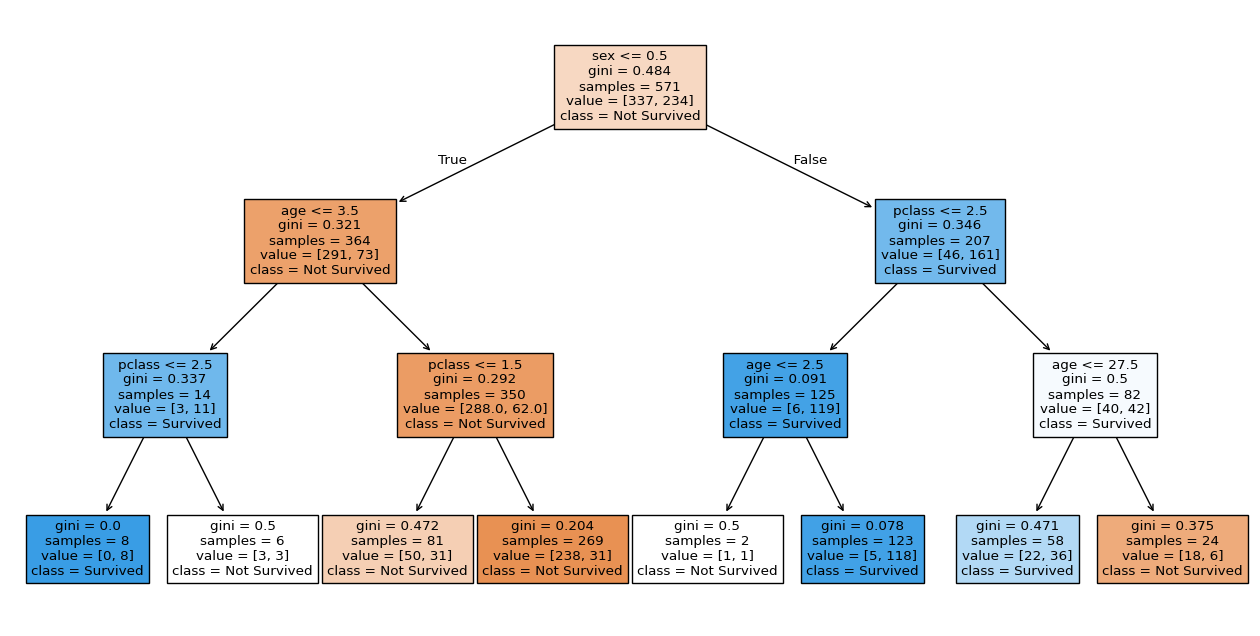

In [3]:
# Step 7: Visualize the tree
plt.figure(figsize=(16, 8))
tree.plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()